In [1]:
from lib.utils import *
from lib.models import *
from tqdm import tqdm
from torch import nn

In [11]:
X,y = load_nursing_by_index(0)
X,y = window_nursing(X,y,window_size=5)

In [12]:
X

tensor([[3.0703, 3.1309, 3.0723,  ..., 9.7578, 9.8984, 9.5312],
        [3.1309, 3.0723, 3.0996,  ..., 9.8984, 9.5312, 9.7031],
        [3.0723, 3.0996, 3.0078,  ..., 9.5312, 9.7031, 9.6484],
        ...,
        [0.7490, 0.8545, 0.7637,  ..., 9.1094, 8.8203, 9.0547],
        [0.8545, 0.7637, 0.6748,  ..., 8.8203, 9.0547, 8.9062],
        [0.7637, 0.6748, 0.8330,  ..., 9.0547, 8.9062, 9.2031]])

In [3]:
window_size = 101
trainloader,devloader,testloader = load_data_convolution(n=2)
device = 'mps'
model = ResNet().to(device=device)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())
params = sum([p.flatten().size()[0] for p in list(model.parameters())])
print("Params: ",params)

Params:  241729


In [7]:
X,y = next(iter(trainloader))


tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

  0%|          | 0/559 [00:00<?, ?it/s]/home/andrew/.local/lib/python3.10/site-packages/torch/nn/modules/conv.py:309: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ../aten/src/ATen/native/Convolution.cpp:895.)
  return F.conv1d(input, weight, bias, self.stride,
100%|██████████| 559/559 [00:04<00:00, 125.85it/s]


tensor(0.0654)


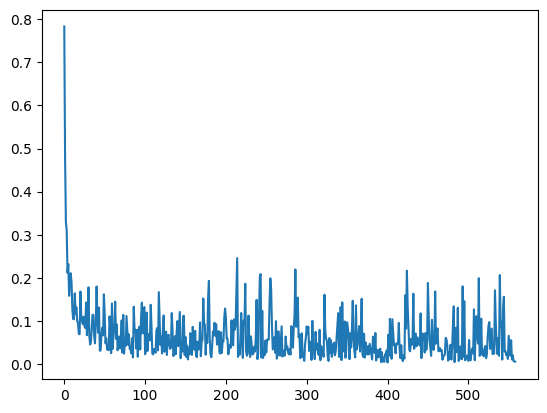

In [4]:
lossi = []
model.train()

for i in range(1):
    for (X_tr,y_tr) in tqdm(trainloader):
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        lossi.append(loss.item())

plt.plot(lossi)
print(torch.tensor(lossi).mean())

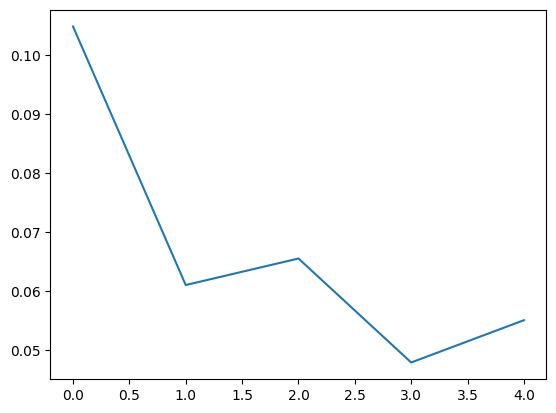

In [5]:
res = 100
plt.plot(torch.tensor(lossi)[:len(lossi)-len(lossi)%res].view(-1,res).mean(1))

In [ ]:
loss_tr = []
loss_dev = []
pbar = tqdm(range(10))

for epoch in pbar:
    # train loop
    model.train()
    loss_tr_total = 0
    for (X_tr,y_tr) in trainloader:
        X_tr,y_tr = X_tr.to(device),y_tr.to(device)
        logits = model(X_tr)
        loss = criterion(logits,y_tr)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_tr_total += loss.item()
    loss_tr.append(loss_tr_total/len(trainloader))

    # dev loop
    model.eval()
    loss_dev_total = 0
    for (X_dv,y_dv) in devloader:
        X_dv,y_dv = X_dv.to(device),y_dv.to(device)
        logits = model(X_dv)
        loss = criterion(logits,y_dv)
        loss_dev_total += loss.item()
    loss_dev.append(loss_dev_total/len(devloader))

plt.plot(loss_tr,label='train')
plt.plot(loss_dev,label='dev')
plt.legend()

100%|██████████| 187/187 [00:00<00:00, 693.74it/s]


(0.038941611665335885,
 tensor([[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]),
 tensor([[3.8191e-03],
         [1.8549e-04],
         [1.1539e-02],
         ...,
         [2.1874e-03],
         [5.6081e-05],
         [1.3489e-03]]))

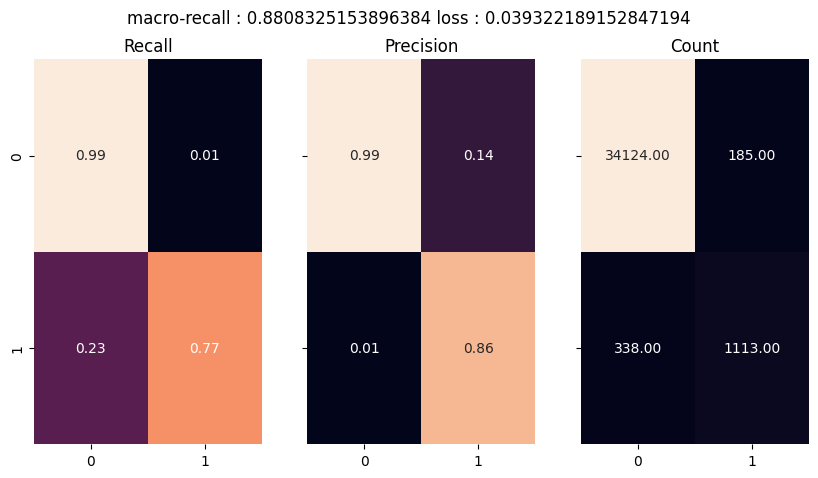

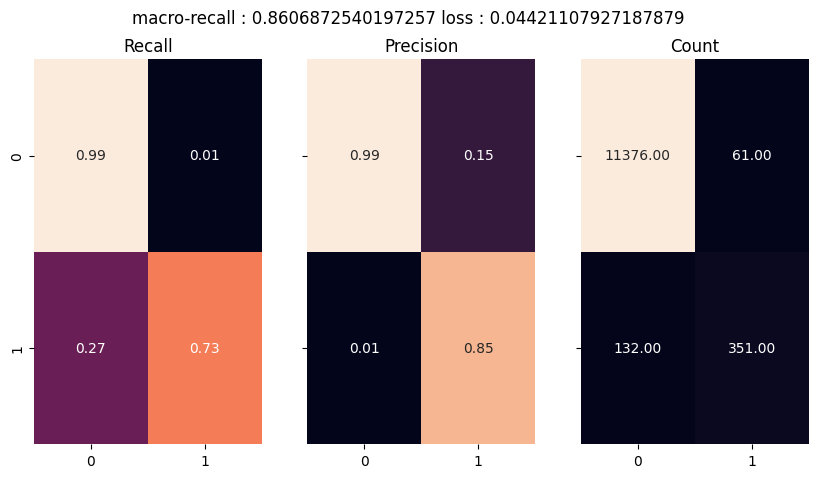

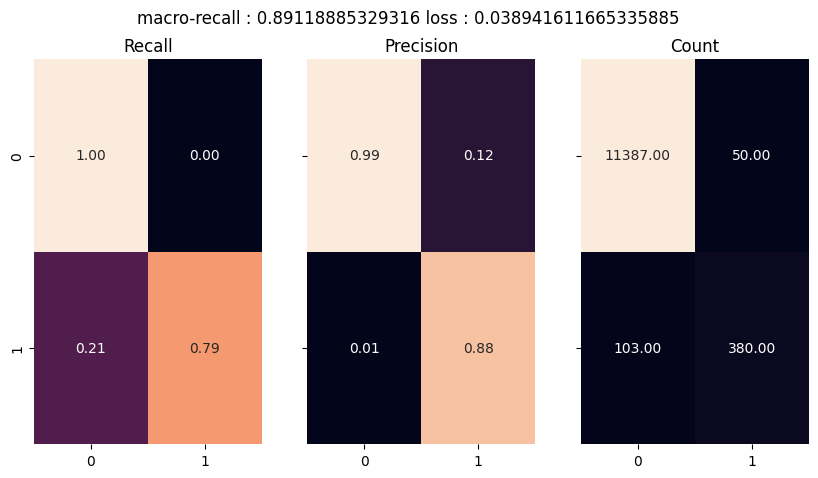

In [6]:
test_evaluation(trainloader,model,criterion)
test_evaluation(devloader,model,criterion)
test_evaluation(testloader,model,criterion)